<a href="https://colab.research.google.com/github/ravidipu90/self-projects-/blob/main/_Wonder_Wine__Price__Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
df= pd.read_csv('/content/train.csv',on_bad_lines='skip',encoding= 'unicode_escape',lineterminator='\n')

In [ ]:
# Display the first few rows of the dataset
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [ ]:
df.shape

(82653, 12)

In [ ]:
# Get basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82653 entries, 0 to 82652
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63260 non-null  object 
 1   country             82618 non-null  object 
 2   review_title        82653 non-null  object 
 3   review_description  82653 non-null  object 
 4   designation         59008 non-null  object 
 5   points              82653 non-null  int64  
 6   price               77084 non-null  float64
 7   province            82618 non-null  object 
 8   region_1            69899 non-null  object 
 9   region_2            35945 non-null  object 
 10  winery              82653 non-null  object 
 11  variety             82653 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB
None


In [ ]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23645
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [ ]:
# Summary statistics of numerical columns
print(df.describe())


             points         price
count  82653.000000  77084.000000
mean      88.544493     36.923110
std        3.099691     43.699288
min       80.000000      4.000000
25%       86.000000     18.000000
50%       88.000000     27.000000
75%       91.000000     45.000000
max      100.000000   3300.000000


<Axes: >

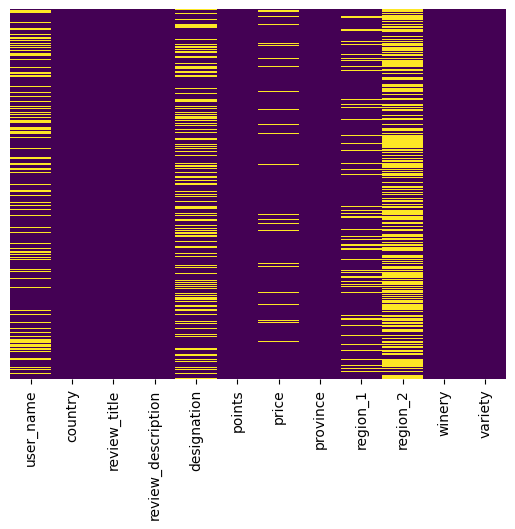

In [ ]:
#checking the missing values for cleaning the data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
avgVarietyPrice = df.groupby(['variety']).mean()
avgVarietyPrice

<ipython-input-9-97da53bac89b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avgVarietyPrice = df.groupby(['variety']).mean()


,points,price
variety,,
Bordeaux-style Red Blend,89.102601,47.988674
Bordeaux-style White Blend,88.692941,34.422868
Cabernet Franc,88.191781,34.932701
Cabernet Sauvignon,88.581380,47.843800
Champagne Blend,89.723742,71.593011
Chardonnay,88.325641,34.718591
Gamay,88.058824,20.762406
Gewürztraminer,88.578571,25.847029
Grüner Veltliner,90.051185,28.251116


In [ ]:
# Count of unique values in each column
print(df.nunique())

user_name                15
country                  38
review_title          76980
review_description    77625
designation           26423
points                   21
price                   351
province                358
region_1               1019
region_2                 17
winery                13786
variety                  28
dtype: int64


In [ ]:
priceDist = df[df['price'] < 250]
priceDistFig = px.histogram(priceDist, 'price', title = 'Distribution of Wine Price', width = 400, height = 400, nbins = 30)
priceDistFig.show()

In [ ]:
provinceCount =  df.groupby(['province'])
provinceCount = provinceCount['province'].count()
provinceCount = provinceCount.nlargest(10, 'first')
provinceCount = px.bar(provinceCount, x = 'province', title = 'Top 10 Wine Producing Provinces', width = 400, height = 400)
provinceCount.update_layout(yaxis_title = "province", xaxis_title = "count")
provinceCount.show()

In [ ]:
countryCount =  df.groupby(['variety']).size().reset_index(name = "count").nlargest(10, 'count')
countryFig = px.pie(countryCount, 'variety', 'count', color = 'variety', title = 'Top 10 Wine Varieties', width = 800, height = 800)
countryFig.show()

In [ ]:
pointsDistFig = px.histogram(df, 'points', title = 'Distribution of Wine Points', width = 800, height = 800, nbins = 30)
pointsDistFig.show()

<Axes: title={'center': 'Top 10 Wine Producing Countries by Price'}, xlabel='Country', ylabel='Price'>

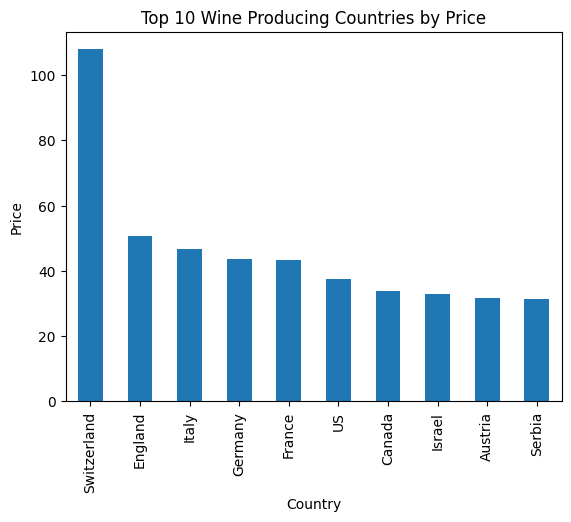

In [ ]:
countryPrice =  df.groupby(['country'])
countryPrice = countryPrice['price'].mean()
countryPrice = countryPrice.nlargest(10, 'first')
countryPrice = countryPrice.plot(kind='bar', ylabel = 'Price', xlabel = 'Country', title = 'Top 10 Wine Producing Countries by Price')
countryPrice

<Axes: title={'center': 'Top 10 Most Common Wineries by Price'}, xlabel='Winery', ylabel='Price'>

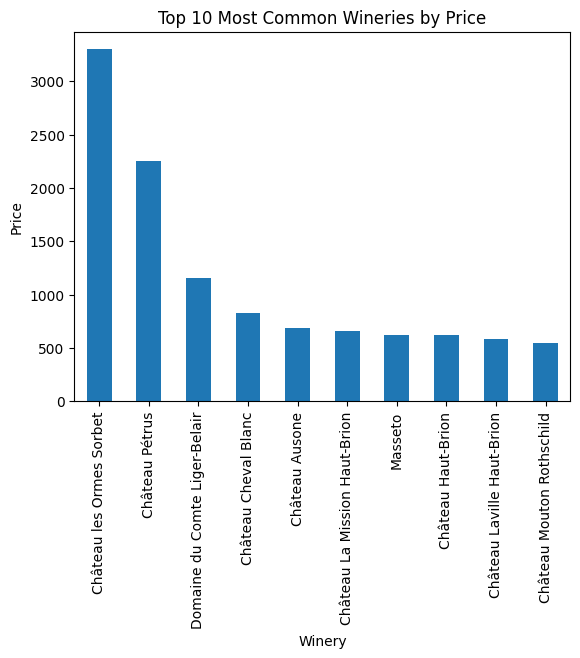

In [ ]:
wineryPrice =  df.groupby(['winery'])
wineryPrice = wineryPrice['price'].mean()
wineryPrice = wineryPrice.nlargest(10, 'first')
wineryPrice = wineryPrice.plot(kind='bar', ylabel = 'Price', xlabel = 'Winery', title = 'Top 10 Most Common Wineries by Price')
wineryPrice

<Axes: title={'center': 'Top 10 Wine Producing Provinces by Price'}, xlabel='Province', ylabel='Price'>

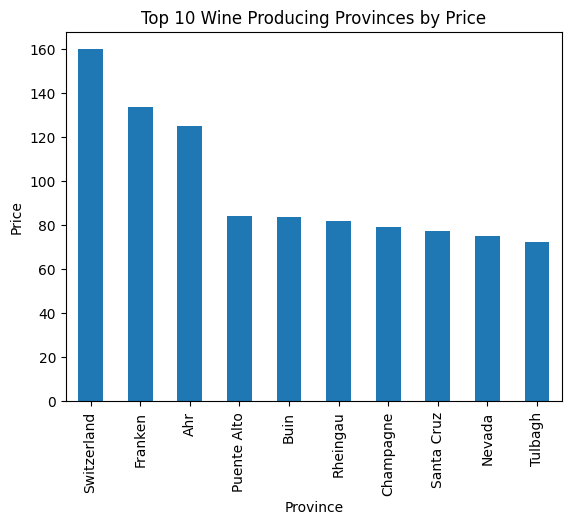

In [ ]:
provincePrice =  df.groupby(['province'])
provincePrice = provincePrice['price'].mean()
provincePrice = provincePrice.nlargest(10, 'first')
provincePrice = provincePrice.plot(kind='bar', ylabel = 'Price', xlabel = 'Province', title = 'Top 10 Wine Producing Provinces by Price')
provincePrice

In [ ]:
#commonWineries =  df.groupby(['winery'])
#commonWineries = commonWineries['winery'].count()
#commonWineries = commonWineries.nlargest(10, 'first')
#commonWineries = commonWineries.plot(kind='bar', ylabel = 'Count', xlabel = 'Winery', title = 'Top 10 Most Common Wineries')
#commonWineries


<Axes: title={'center': 'Top 10 Most Common Wine Varieties by Price'}, xlabel='Variety', ylabel='Price'>

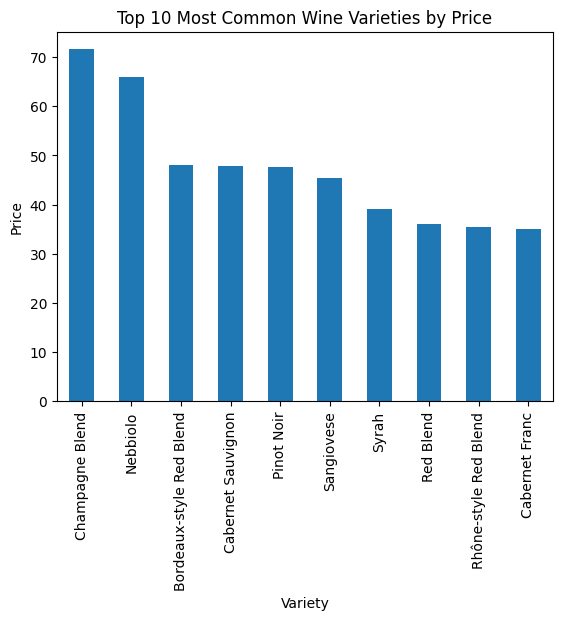

In [ ]:
varietyPrice =  df.groupby(['variety'])
varietyPrice = varietyPrice['price'].mean()
varietyPrice = varietyPrice.nlargest(10, 'first')
varietyPrice = varietyPrice.plot(kind='bar', ylabel = 'Price', xlabel = 'Variety', title = 'Top 10 Most Common Wine Varieties by Price')
varietyPrice

<Axes: title={'center': 'Top 10 Most Common Varieties'}, xlabel='Variety', ylabel='Count'>

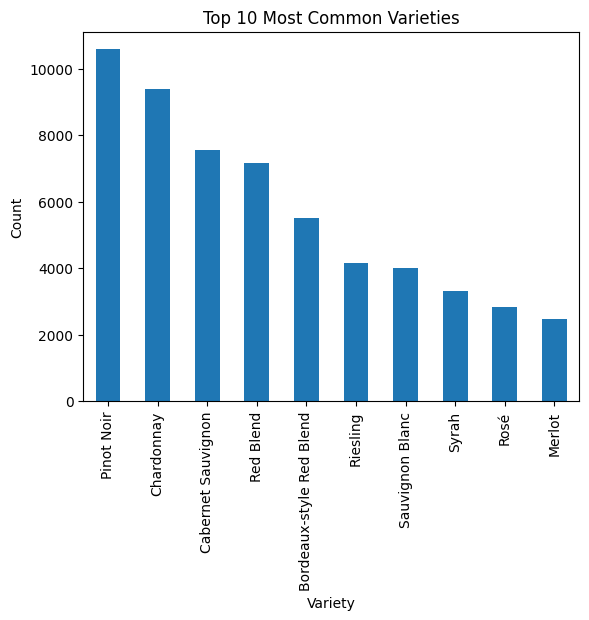

In [ ]:
commonVarieties =  df.groupby(['variety'])
commonVarieties = commonVarieties['variety'].count()
commonVarieties = commonVarieties.nlargest(10, 'first')
commonVarieties = commonVarieties.plot(kind='bar', ylabel = 'Count', xlabel = 'Variety', title = 'Top 10 Most Common Varieties')
commonVarieties

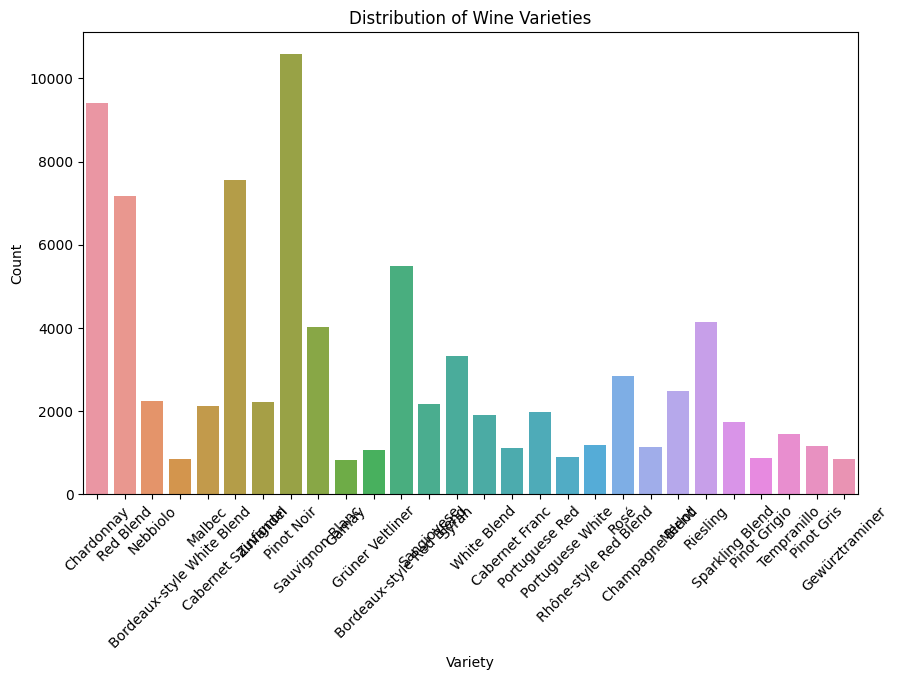

In [ ]:
# Plot the count of each wine variety
plt.figure(figsize=(10, 6))
sns.countplot(x='variety', data=df)
plt.xticks(rotation=45)
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Distribution of Wine Varieties')
plt.show()


Analyze numerical features

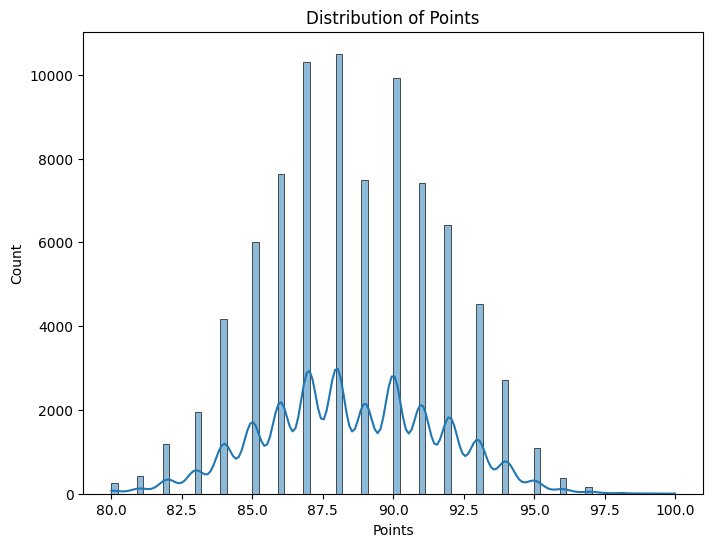

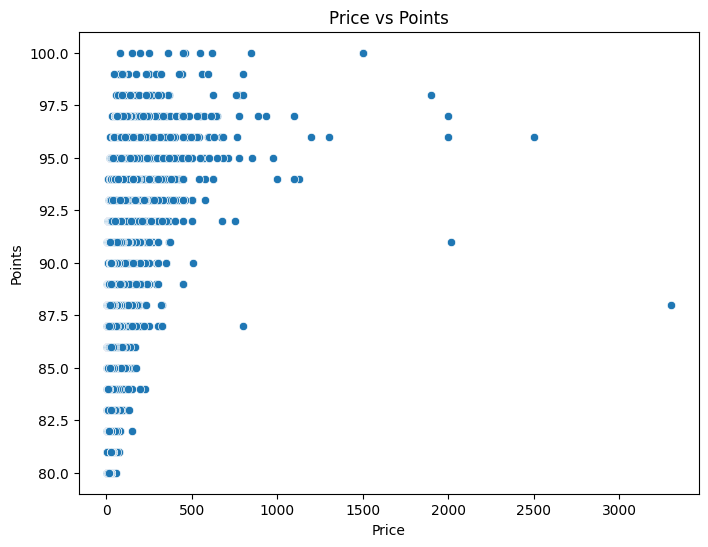

In [ ]:
# Plot a histogram of the 'points' feature
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='points', kde=True)
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Distribution of Points')
plt.show()

# Plot a scatter plot of 'price' vs 'points'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='points')
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Price vs Points')
plt.show()


Analyze categorical features

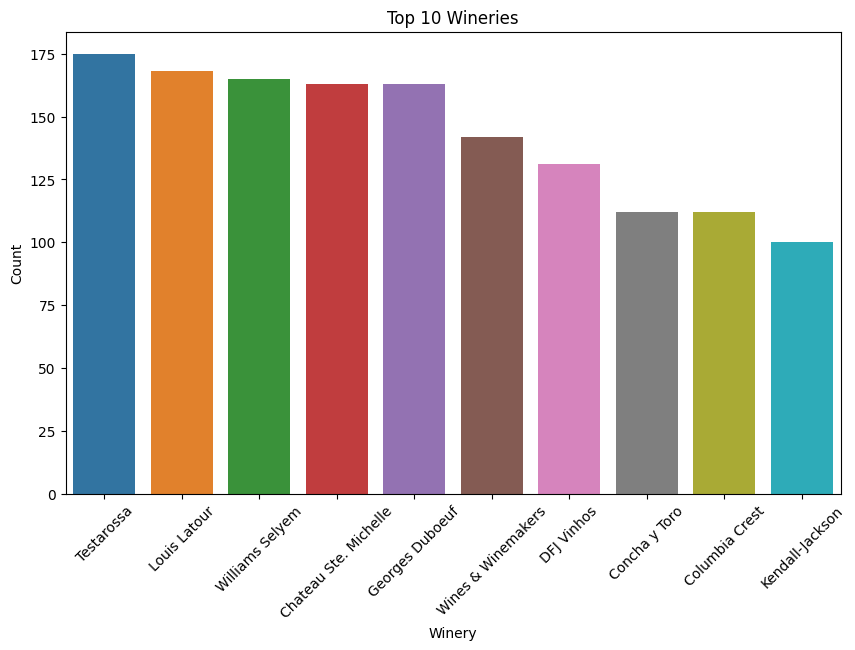

In [ ]:
# Plot a bar chart of the top 10 wineries
plt.figure(figsize=(10, 6))
top_10_wineries = df['winery'].value_counts().head(10)
sns.barplot(x=top_10_wineries.index, y=top_10_wineries.values)
plt.xticks(rotation=45)
plt.xlabel('Winery')
plt.ylabel('Count')
plt.title('Top 10 Wineries')
plt.show()



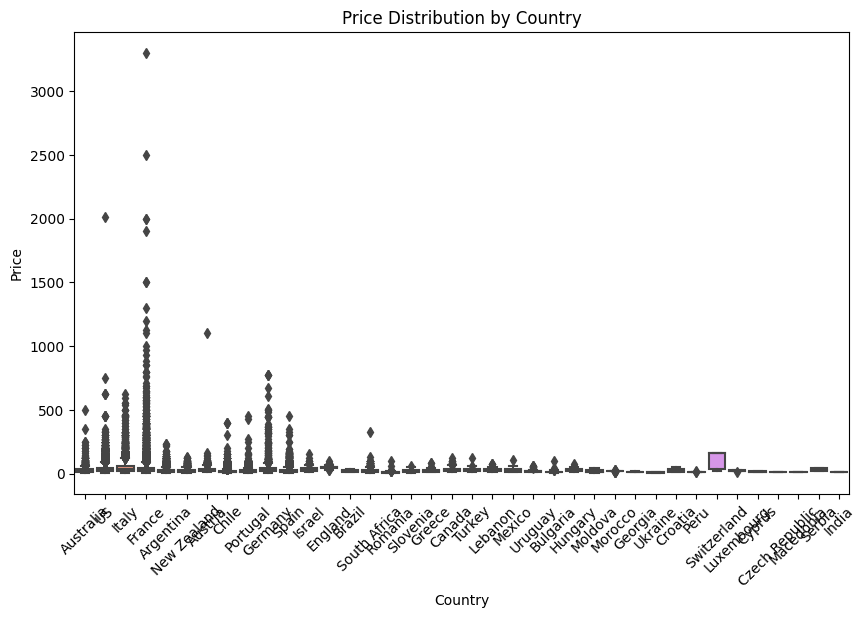

In [ ]:
# Plot a box plot of 'price' for each country
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='price')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Price')
plt.title('Price Distribution by Country')
plt.show()


<ipython-input-25-36a866ed0525>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



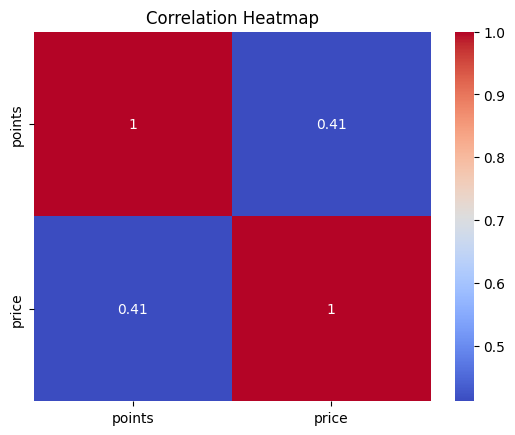

In [ ]:

# correlation matrix
correlation_matrix = df.corr()
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

In [ ]:
# Drop unnecessary columns
df = df.drop(['user_name', 'country', 'review_title', 'designation', 'points', 'price', 'province',
              'region_1', 'region_2', 'winery'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Encode the target variable (variety) using LabelEncoder
label_encoder = LabelEncoder()
df['variety'] = label_encoder.fit_transform(df['variety'])

# Split the dataset into train and test sets
X = df['review_description']
y = df['variety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training set
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test set
X_test_tfidf = vectorizer.transform(X_test)




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6415824813985844


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train an SVM classifier
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the variety for test data
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1119
           1       0.79      0.36      0.50       157
           2       0.92      0.29      0.44       206
           3       0.56      0.81      0.67      1518
           4       0.84      0.55      0.66       226
           5       0.68      0.94      0.79      1844
           6       0.94      0.50      0.66       167
           7       0.83      0.54      0.65       171
           8       0.78      0.62      0.69       217
           9       0.66      0.45      0.53       406
          10       0.85      0.39      0.53       489
          11       0.82      0.80      0.81       474
          12       0.87      0.55      0.67       164
          13       0.87      0.40      0.55       225
          14       0.70      0.87      0.78      2153
          15       0.74      0.63      0.68       392
          16       0.85      0.43      0.57       198
          17       0.72    

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report

# Split the dataset into features (X) and target variable (y)
#X = df['review_description']
#y = df['variety']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
#vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
#X_train_vec = vectorizer.fit_transform(X_train)
#X_test_vec = vectorizer.transform(X_test)

# Train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)

# Predict the variety for test data
y_pred1 = knn_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.40      0.71      0.51      1119
           1       0.25      0.32      0.28       157
           2       0.17      0.20      0.18       206
           3       0.38      0.57      0.46      1518
           4       0.48      0.42      0.45       226
           5       0.57      0.71      0.63      1844
           6       0.32      0.31      0.31       167
           7       0.54      0.36      0.43       171
           8       0.57      0.52      0.54       217
           9       0.35      0.28      0.31       406
          10       0.21      0.12      0.16       489
          11       0.64      0.70      0.67       474
          12       0.52      0.57      0.54       164
          13       0.38      0.25      0.30       225
          14       0.63      0.56      0.60      2153
          15       0.47      0.55      0.51       392
          16       0.53      0.39      0.45       198
          17       0.57    

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import CosineDecay
import tensorflow as tf
from tensorflow.keras.layers import Dropout

# Tokenize and pad the review_description column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["review_description"])
sequences = tokenizer.texts_to_sequences(df["review_description"])
max_sequence_length = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Separate the target variable
y = df["variety"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_sequence_length))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

initial_learning_rate = 0.001
lr_schedule = CosineDecay(initial_learning_rate, len(X_train))
optimizer = tf.keras.optimizers.Adam(lr_schedule)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Split a portion of training data for validation
validation_split = 0.2
validation_samples = int(validation_split * len(X_train))

# Fit the model with validation data
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
epochs = 15
history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_split=validation_split,callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/15
1654/1654 [==============================] - 68s 36ms/step - loss: 2.0725 - accuracy: 0.3636 - val_loss: 1.5472 - val_accuracy: 0.5207
Epoch 2/15
1654/1654 [==============================] - 22s 13ms/step - loss: 1.3036 - accuracy: 0.5920 - val_loss: 1.2012 - val_accuracy: 0.6243
Epoch 3/15
1654/1654 [==============================] - 18s 11ms/step - loss: 0.9677 - accuracy: 0.7002 - val_loss: 1.0904 - val_accuracy: 0.6685
Epoch 4/15
1654/1654 [==============================] - 19s 12ms/step - loss: 0.7780 - accuracy: 0.7591 - val_loss: 1.0899 - val_accuracy: 0.6794
Epoch 5/15
1654/1654 [==============================] - 18s 11ms/step - loss: 0.6371 - accuracy: 0.8033 - val_loss: 1.1201 - val_accuracy: 0.6751
Epoch 6/15
1654/1654 [==============================] - 19s 12ms/step - loss: 0.5283 - accuracy: 0.8365 - val_loss: 1.1910 - val_accuracy: 0.6763
Epoch 7/15
517/517 [==============================] - 2s 4ms/step - loss: 1.0757 - accuracy: 0.6815
Test Loss: 1.07567083835

In [ ]:
df1= pd.read_csv('/content/test.csv',on_bad_lines='skip',encoding= 'unicode_escape',lineterminator='\n')
df1.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [ ]:
# Drop unnecessary columns
df1 = df1.drop(['user_name', 'country', 'review_title', 'designation', 'points', 'price', 'province',
              'region_1', 'region_2', 'winery'], axis=1)

# Drop rows with missing values
df1= df1.dropna()

# Encode the target variable (variety) using LabelEncoder
#label_encoder = LabelEncoder()
#df['variety'] = label_encoder.fit_transform(df['variety'])

# Split the dataset into train and test sets
X = df1['review_description']
print(X[0:5])
#y = df['variety']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of TfidfVectorizer
#vectorizer = TfidfVectorizer()

# Fit and transform the training set
X = vectorizer.transform(X)



0    Nicely differentiated from the companion Stewa...
1    Charred, smoky, herbal aromas of blackberry tr...
2    Slightly sour and funky in earth, this is a re...
3    This concentrated, midnight-black Malbec deliv...
4    Earthy aromas suggesting grilled porcini, leat...
Name: review_description, dtype: object


In [ ]:
print(X[0:5])

  (0, 23860)	0.17202665545210047
  (0, 23674)	0.039795040278197025
  (0, 22083)	0.17555542503899355
  (0, 21679)	0.05639617270010262
  (0, 21593)	0.11736495458632466
  (0, 21485)	0.035411747171280164
  (0, 21426)	0.06809172673739365
  (0, 21168)	0.11115383538798436
  (0, 20795)	0.22971571398566815
  (0, 20236)	0.30712233878581185
  (0, 19909)	0.10907712080404884
  (0, 19691)	0.10305358409986408
  (0, 19583)	0.2092243673627157
  (0, 19008)	0.14708596334026086
  (0, 17123)	0.10114609315866702
  (0, 14819)	0.27973901958960906
  (0, 14320)	0.14460652868506488
  (0, 14159)	0.21007474391750958
  (0, 12208)	0.21688624298681122
  (0, 11213)	0.04485806936149137
  (0, 8980)	0.05812416672426161
  (0, 8947)	0.06914185275064812
  (0, 8684)	0.07938848163407683
  (0, 8357)	0.06609112855952884
  (0, 8215)	0.1828718942471493
  :	:
  (4, 14677)	0.11096317415759241
  (4, 14470)	0.1367061461703322
  (4, 14453)	0.09979817085851556
  (4, 14211)	0.1559899173944138
  (4, 13112)	0.1629643863045712
  (4, 12205)

In [ ]:
Y_pred = rf_model.predict(X)
print(Y_pred[0:5])


[14  9  5  9 21]


In [ ]:
Y_pred1 = svm_classifier.predict(X)
print(Y_pred[0:5])

[14  9  5  9 21]


In [ ]:
Y_pred1=label_encoder.inverse_transform(Y_pred )
print(Y_pred1[0:5])



['Pinot Noir' 'Malbec' 'Chardonnay' 'Malbec' 'Sangiovese']


In [ ]:
df1= pd.read_csv('/content/test.csv',on_bad_lines='skip',encoding= 'unicode_escape',lineterminator='\n')
df1['Variety_pred']= Y_pred1
df1.to_csv('test_pred.csv')

A feature used for variety classification Task is  review_description



Result:

MODEL:                                Accuracy

Random forest                          64%

SVM                                   72%

KNN                                   52%

LSTM                                  68%
